Bacis Ensemble Technique

Dataset : Breast Cancer Dataset

Models : Classifier Model

In [2]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [3]:
print(dataset.DESCR)
print(dataset.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [5]:
X=np.asarray(dataset.data)
Y=np.asarray(dataset.target)
labels=['malignant' 'benign']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix


In [18]:
Svc_bag=BaggingClassifier(base_estimator=SVC(),n_estimators=7,max_samples=340,bootstrap_features=True,oob_score=True)
Svc_bag.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=True, max_features=1.0,
                  max_samples=340, n_estimators=7, n_jobs=None, oob_score=True,
                  random_state=None, verbose=0, warm_start=False)

0.8967032967032967

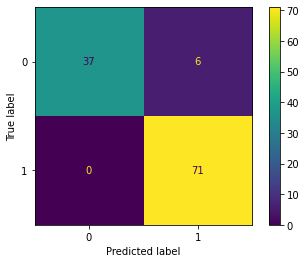

In [22]:
plot_confusion_matrix(Svc_bag, X_test,Y_test)
Svc_bag.oob_score_

In [24]:
from sklearn import tree
dt_bagging=BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=7,max_samples=340,bootstrap_features=True,oob_score=True)
dt_bagging.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


0.9274725274725275

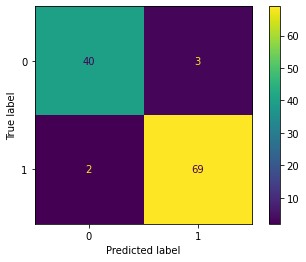

In [25]:
plot_confusion_matrix(dt_bagging, X_test,Y_test)
dt_bagging.oob_score_

In [28]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=5,min_samples_split=15,oob_score=True)
Forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

0.9582417582417583

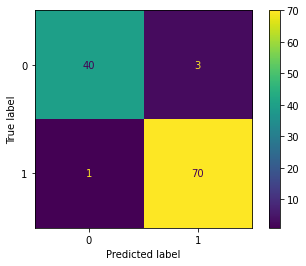

In [31]:
plot_confusion_matrix(Forest, X_test,Y_test)
Forest.oob_score_